In [ ]:
import time
def fib(n,d):
  if n in d:
    return d[n]
  else:
    d[n] = fib(n-1 , d) + fib(n-2 ,d)
    return d[n]

In [ ]:
start = time.time()
d = {0:1,1:1}
print(fib(100,d))
print(time.time() - start)

573147844013817084101
0.0007314682006835938


# New Section

In [ ]:
import numpy as np
import pandas as pd
import time

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
X= df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [ ]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_scaled,y, test_size=0.2 , random_state=2)

In [ ]:
X_train.shape

(320, 2)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy' , optimizer='Adam',metrics=['accuracy'])
start=time.time()
history = model.fit(X_train,y_train,epochs =50,batch_size=32,validation_split=0.2)
print(time.time() - start)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7894 - loss: 0.6206 - val_accuracy: 0.8281 - val_loss: 0.6127
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8361 - loss: 0.5825 - val_accuracy: 0.8281 - val_loss: 0.6058
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8241 - loss: 0.5815 - val_accuracy: 0.8281 - val_loss: 0.5994
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8091 - loss: 0.5829 - val_accuracy: 0.8281 - val_loss: 0.5928
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8079 - loss: 0.5812 - val_accuracy: 0.8281 - val_loss: 0.5862
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8107 - loss: 0.5618 - val_accuracy: 0.8281 - val_loss: 0.5795
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8229 - loss: 0.5699 - val_accuracy: 0.8281 - val_loss: 0.5727
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7937 - loss: 0.5562 - val_accuracy: 0.8281 - val_loss: 0.5652
Epoch 9

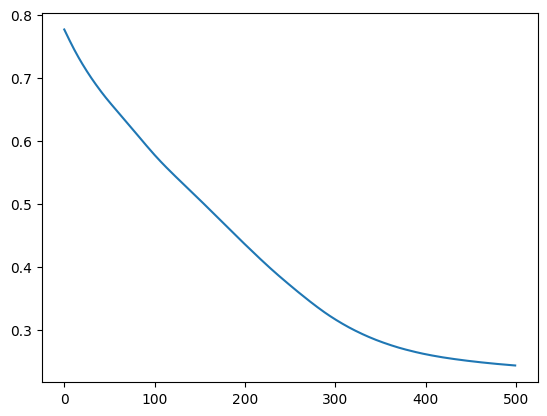

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])